# Importing Libraries and Setup

### Step 1 - Install Quandl Library

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [2]:
# configuring quandle API key

quandl.ApiConfig.api_key = 'key here'

In [3]:
# creating path variable
path = r'/Users/paigepearson/Desktop/Data Analytics/Immersion Course/Achievement 6/Boat Dashboard'

### Step 2 - Import data

Note: I have chosen the unemploment rate data from the Federal Reserve Economic Data. I had a lot of difficulty finding data that didn't have errors during the importing process. For the sake of getting this lesson done I chose the first dataset that worked.

In [4]:
# importing data
data = quandl.get('FRED/UNRATE')

In [5]:
# checking data
data.head()

,Value
Date,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [6]:
data.shape

(889, 1)

In [7]:
data.columns

Index(['Value'], dtype='object')

In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data.isnull().sum() 

Value    0
dtype: int64

Note: Step 3 skipped, the data doesn't need to be reduced into a subset

### Step 4 - Create a Line Chart

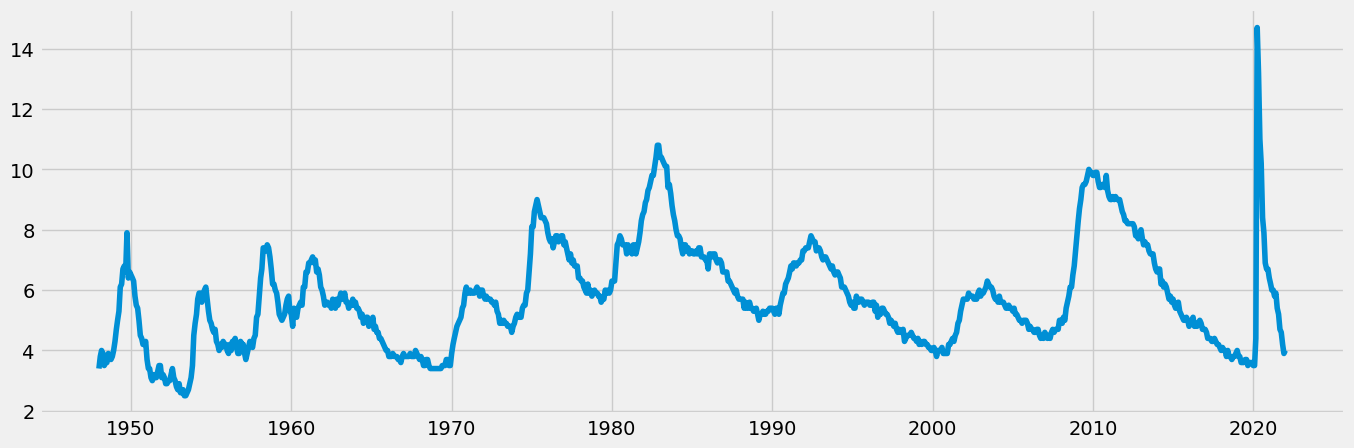

In [10]:
# creating line chart
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data)

### Step 5 - Decompose Data Components

In [11]:
# decomposing the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [12]:
# defining a fixed size for all special charts
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

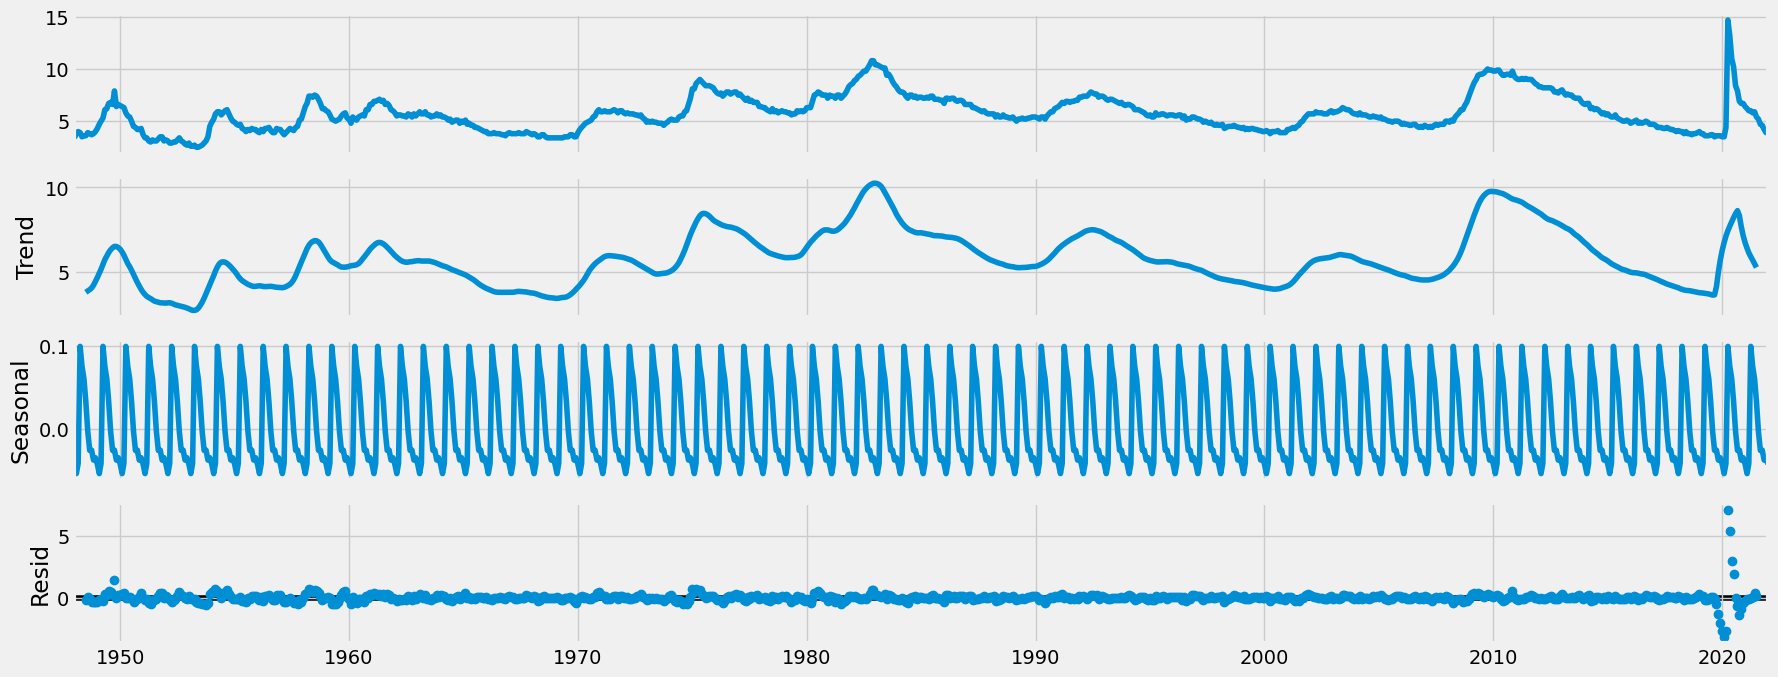

In [13]:
# plotting the separate components
decomposition.plot()
plt.show()

Note: My original data and the trend line have only minimal differences. There is seasonality in the data as shown by the regular modularity in the seasonal line. There is data going back over 70 years and it is interesting to see the regularity of the unemployment rate in America. 2020 is the extreme spike, which aligns with what I saw during the onset and height of the pandemic, but the trend line smooths this out, and the noise also shows things that couldn't be accounted for. Because the pandemic brought about unusual data, it makes me wonder if those world events pushed this type of analysis to the limit of what it's capable of understanding or if there is truly something that couldn't be explained and ended up on the noise line.

### Step 6 - Test for Seasonality

Note: Based soley on site of the line chart it looks like the dataset already has stationarity. The line remains by and large horizontal throughout the changes in the unemployment rate. I won't just trust my eyes though and will test for seasonality.

In [15]:
# importing adfuller() function
from statsmodels.tsa.stattools import adfuller 

# defining the function
def dickey_fuller(timeseries): 
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# applying the test using the function on the time series
dickey_fuller(data['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -3.930331
p-value                          0.001823
Number of Lags Used              1.000000
Number of Observations Used    887.000000
Critical Value (1%)             -3.437744
Critical Value (5%)             -2.864804
Critical Value (10%)            -2.568508
dtype: float64


Note: I want to disprove my null hypothesis. If the unit root is not found then the data is stationary, and if it is there then the data is non-stationary.

The p-value is below 0.05 and thus considered significant. The test statistic is smaller than the critical value at any percent. This means I can reject the null hypothesis, meaning there is no unit root and the data is stationary.

Hypothesis: There is an absense of a unit root.
Null Hypothesis: There is a presence of a unit root.

Test statistic larger than critical value: can't reject null hypothesis
Test statistic smaller than critical value: can reject null hypothesis

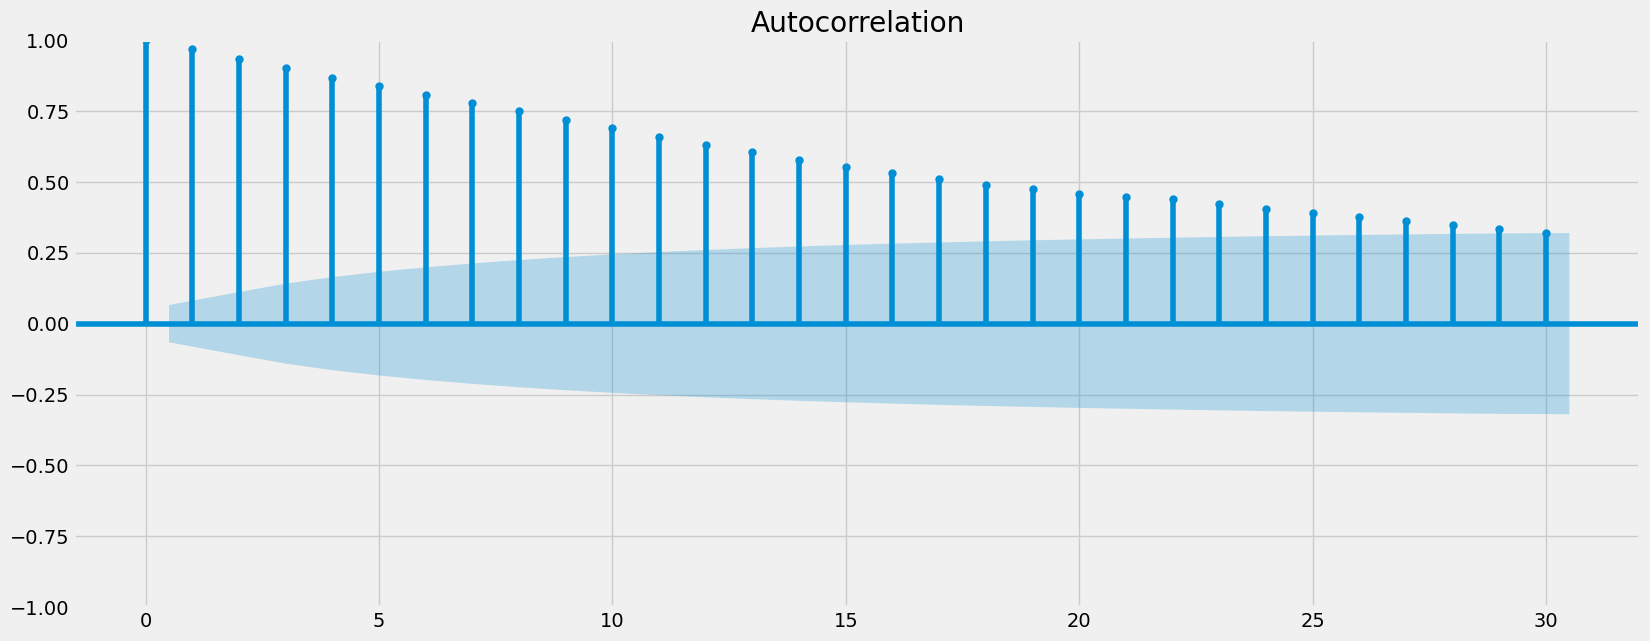

In [17]:
# plotting autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data)
plt.show()

Note: The lines in the chart go above the blue area, which would suppor that the data is non-stationary, in opposition to the earlier Dickey-Fuller test. However, the chart color is different than in the lesson as the lines are blue and not black, and so I am wondering if that means something about the results. There is a trend toward the lags getting closer to the blue area.

Steps 7-8 skipped as data is stationary

### Step 7/8 - Conducting a Round of Differencing

In [20]:
# The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)
data_diff = data - data.shift(1) 

In [21]:
# removing the missing values that came about as a result of the differencing. 
data_diff.dropna(inplace = True)

In [22]:
# checking work
data_diff.head()

,Value
Date,
1948-02-01,0.4
1948-03-01,0.2
1948-04-01,-0.1
1948-05-01,-0.4
1948-06-01,0.1


In [23]:
data_diff.columns

Index(['Value'], dtype='object')

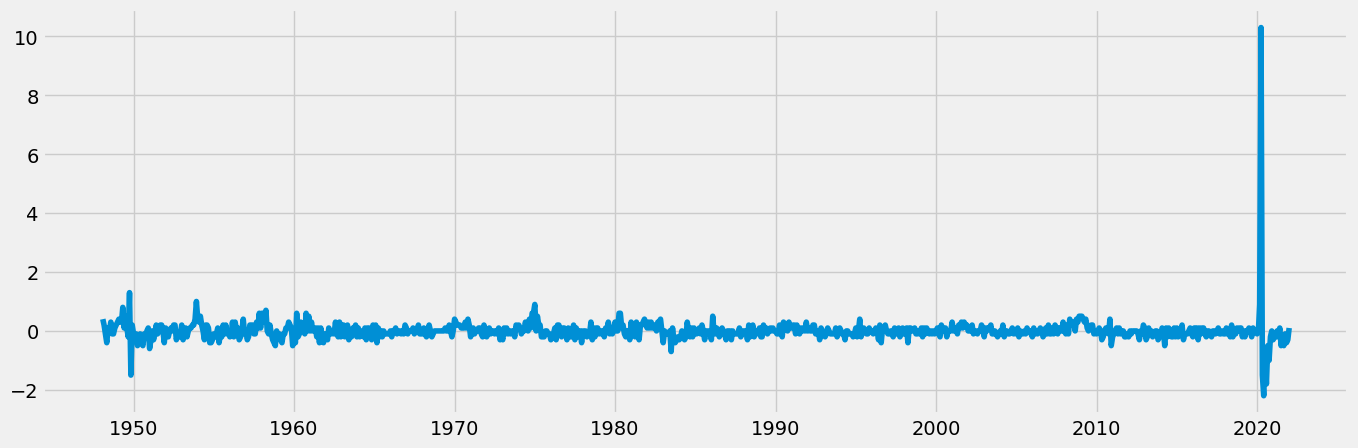

In [24]:
# examining what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

### Step 9 - Check Autocorrelation

In [31]:
# redoing dickey_fuller test on new dataset
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -28.541075
p-value                          0.000000
Number of Lags Used              0.000000
Number of Observations Used    887.000000
Critical Value (1%)             -3.437744
Critical Value (5%)             -2.864804
Critical Value (10%)            -2.568508
dtype: float64


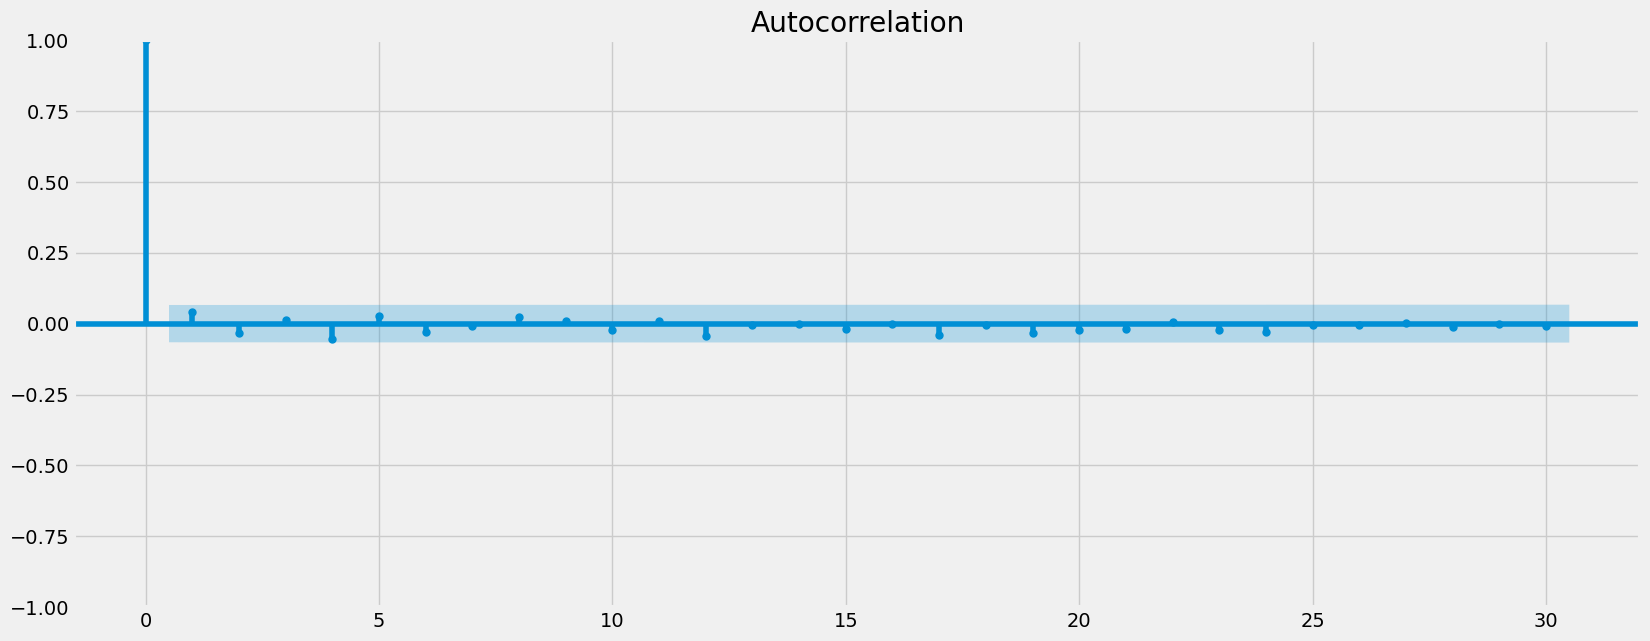

In [32]:
# checking autocorrelations
plot_acf(data_diff)
plt.show()

Note: While the lines are not within the blue area, I think perhaps the round of differencing went to an extreme with this data, and am unsure how to proceed or interpret this chart other than this is now showing non-stationary data.